## README

O cartpy é uma ferramenta para facilitar o acesso às bases cartográficas do IBGE e às estatísticas históricas dos territórios dos municípios brasileiros. Abaixo seguem instruções de instalação e uso

### 1- Instalação

O pacote está disponível no índice de pacotes do python ([PyPi](https://pypi.org/)) e, assim, pode facilmente ser instalado usando:<br>
```python
pip install cartpy
```

### 2- Uso

O cartpy possui duas classes, Year e Municipio, vamos apresentar o uso básico do pacote abordando cada classe individualmente.

#### 2.1 -Year

Essa classe serve basicamente para dar acesso direto às bases do IBGE. Assim, digamos que estejamos interessados em baixar os dados do ano de 1872, data do primeiro censo brasileiro. Para isso, basta fazer:

In [1]:
import cartpy

In [2]:
data1872=cartpy.Year(1872)

Com método get_geodata temos acesso à base em formato de dataframe do geopandas:

In [4]:
sf=data1872.get_geodata()

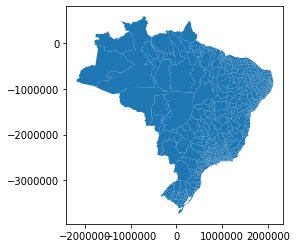

In [5]:
sf.plot()

Se o usuário estiver interessado em apenas um estado, basta especificar o código ou a sigla:

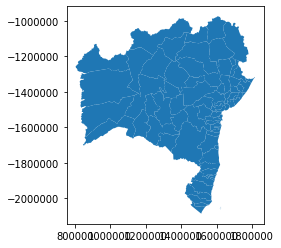

In [7]:
data1872.get_geodata(state='BA').plot()

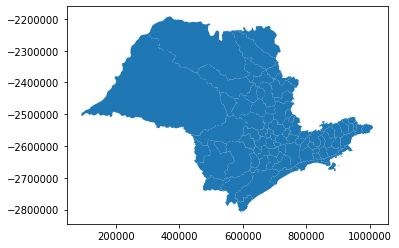

In [8]:
data1872.get_geodata(state=35).plot()

Também é possível ter acesso à base de municípios específicos, caso em que também é preciso especificar o estado. Novamente é possível usa o código ou o nome da unidade federativa em questão

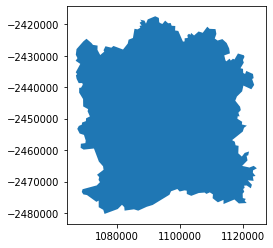

In [10]:
data1872.get_geodata(state='MG',county='Juiz De Fora').plot()

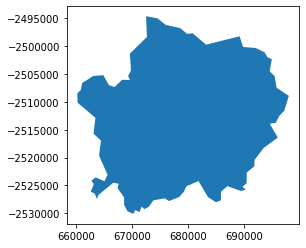

In [9]:
data1872.get_geodata(state='SP',county=3526902).plot() #Limeira

Qualquer das bases pode ser salva como um shapefile usando:<br>
```python
sf.to_file('filename.shp')
```

#### 2.2 - Municipio

A classe Municipio() oferece uma forma simplificada de ter acesso a diversos dados cartográficos dos municípios brasileiros em perspectiva histórica. <br>
Essa classe aceita qualquer string quando é instanciada, mas só aceitará a aplicação de seus respectivos métodos se a string usada corresponder ao município. Para evitar frustrações, é interessante usar o método search para verificar qual a ortografia da base:

In [62]:
mun=cartpy.Municipio('Barreiro')
mun.search(year=1991)

1991
Barreiros:  ['PE']
Sao Jose Do Barreiro:  ['SP']
Barreira:  ['CE']
Barreiras:  ['BA']
Careiro:  ['AM']


Agora instanciamos novamente a classe, corrigindo a ortografia para ficar igual a base:

In [63]:
mun=cartpy.Municipio('Sao Jose Do Barreiro')

Na versão atual, a classe Municipio tem os seguintes métodos:

In [64]:
mun.get_code(state='SP',year=1991)

3549607

In [65]:
mun.all_names(code=3549607)

Sao Jose Do Barreiro
Sao Jose Dos Barreiros
Barreiro


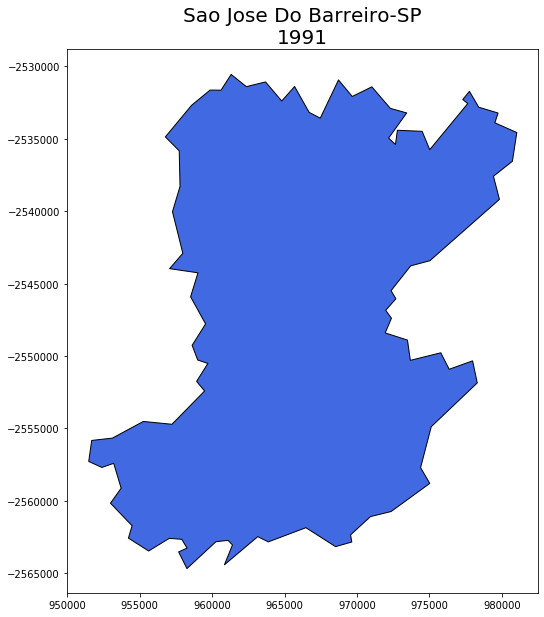

In [66]:
mun.get_map(state='SP',year=1991)

Essa é apenas a primeira versão do pacote, outras funcionalidades serão acrescentadas ao longo do tempo por mim e/ou pela comunidade de usuários